<a href="https://colab.research.google.com/github/kzawora/mnist_model_sandbox/blob/master/mnist_model_sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = tf.expand_dims(x_train, 3)
x_test = tf.expand_dims(x_test, 3)

In [4]:
def fullyConnectedModel(fcNeurons=128):
    return tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
      tf.keras.layers.Dense(fcNeurons, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10)
    ])

In [12]:
def fullyConnectedDeepModel():
    return tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
      tf.keras.layers.Dense(1024, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10)
    ])

In [5]:
def convModel(filters=32):
  return tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters, 3, activation='relu', padding='same', input_shape=(28,28,1)),
 #   tf.keras.layers.Dropout(0.2),
 #   tf.keras.layers.Conv2D(filters, 3, activation='relu', padding='same', input_shape=(28,28,1)),
    tf.keras.layers.Dropout(0.2),
#    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()
  ])

In [6]:
def rnnModel():
  return tf.keras.models.Sequential([
    tf.keras.layers.Reshape((28,28)),
    tf.keras.layers.LSTM(28, time_major=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()
  ])

In [13]:
model = fullyConnectedDeepModel()

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4211 - accuracy: 0.8861
Epoch 2/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1901 - accuracy: 0.9566
Epoch 3/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1491 - accuracy: 0.9658
Epoch 4/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1268 - accuracy: 0.9706
Epoch 5/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1095 - accuracy: 0.9743


In [16]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.1110 - accuracy: 0.9746


[0.11096718907356262, 0.9746000170707703]

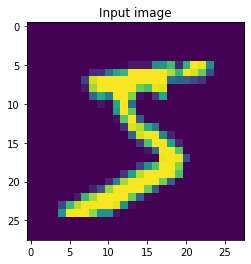

Prediction: [5]
CORRECT!


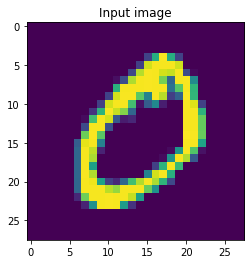

Prediction: [0]
CORRECT!


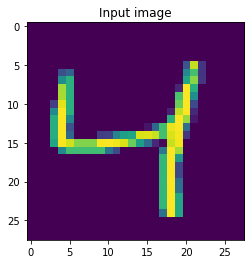

Prediction: [4]
CORRECT!


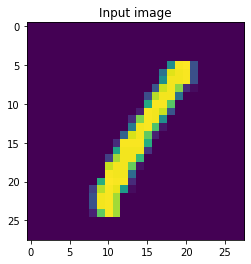

Prediction: [1]
CORRECT!


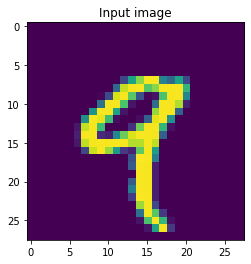

Prediction: [9]
CORRECT!


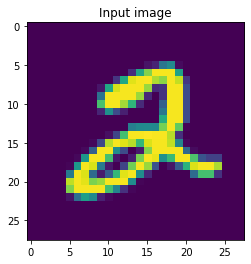

Prediction: [2]
CORRECT!


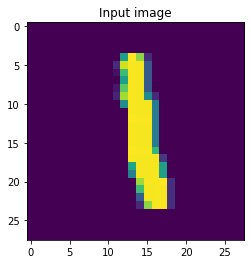

Prediction: [1]
CORRECT!


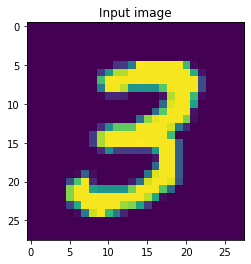

Prediction: [3]
CORRECT!


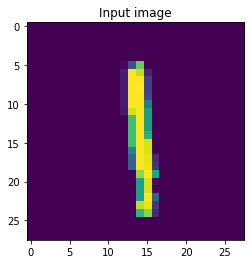

Prediction: [1]
CORRECT!


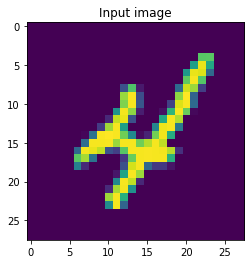

Prediction: [4]
CORRECT!


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def display_one(a, title1 = "Input image"):
    plt.imshow(a), plt.title(title1)
    plt.show()

for i in range(10):
  image = x_train[i]
  model_in = tf.expand_dims(image, 0)
  prediction = model.predict(model_in)
  argmax_prediction = tf.math.argmax(prediction, axis=1, output_type=tf.dtypes.int64, name=None).numpy()
  correct = 'CORRECT!' if argmax_prediction == y_train[i] else 'INCORRECT!'
  display_one(tf.squeeze(image,axis=2))
  print(f'Prediction: {argmax_prediction}')
  print(correct)